In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

In [540]:
df = pd.read_csv("C:/Users/Jakub/Documents/GitHub/ESM/data/raw.csv")
diary = df[['ESM_ABDPAIN','Stool_freq','Pain','Diary_discomfort','Diary_belching','Diary_bloating','Diary_flatulence','Diary_diarrhea','Diary_constipation','Diary_urge','Diary_med1_name','Diary_med1_dos','Diary_med1_numb','Diary_med2_name','Diary_med2_dos','Diary_med2_numb','Diary_med3_name','Diary_med3_dos','Diary_med3_numb','Diary_med4_name','Diary_med4_dos','Diary_med4_numb','Diary_med5_name','Diary_med5_dos','Diary_med5_numb','Diary_med6_name','Diary_med6_dos','Diary_med6_numb','Diary_med7_name','Diary_med7_dos','Diary_med7_numb','Diary_med8_name','Diary_med8_dos','Diary_med8_numb']]
diary.head()

,ESM_ABDPAIN,Stool_freq,Pain,Diary_discomfort,Diary_belching,Diary_bloating,Diary_flatulence,Diary_diarrhea,Diary_constipation,Diary_urge,...,Diary_med5_numb,Diary_med6_name,Diary_med6_dos,Diary_med6_numb,Diary_med7_name,Diary_med7_dos,Diary_med7_numb,Diary_med8_name,Diary_med8_dos,Diary_med8_numb
0,2.0,2.0,9.0,7.0,3.0,8.0,4.0,0.0,0.0,1.0,...,NaN,...,...,NaN,...,...,NaN,...,...,NaN
1,4.0,2.0,9.0,7.0,3.0,8.0,4.0,0.0,0.0,1.0,...,NaN,...,...,NaN,...,...,NaN,...,...,NaN
2,4.0,2.0,9.0,7.0,3.0,8.0,4.0,0.0,0.0,1.0,...,NaN,...,...,NaN,...,...,NaN,...,...,NaN
3,7.0,2.0,9.0,7.0,3.0,8.0,4.0,0.0,0.0,1.0,...,NaN,...,...,NaN,...,...,NaN,...,...,NaN
4,9.0,2.0,9.0,7.0,3.0,8.0,4.0,0.0,0.0,1.0,...,NaN,...,...,NaN,...,...,NaN,...,...,NaN


In [541]:
diary.isnull().sum()

ESM_ABDPAIN              1
Stool_freq              39
Pain                    57
Diary_discomfort        51
Diary_belching          51
Diary_bloating          51
Diary_flatulence        51
Diary_diarrhea          51
Diary_constipation      51
Diary_urge              59
Diary_med1_name         39
Diary_med1_dos          39
Diary_med1_numb       2082
Diary_med2_name         39
Diary_med2_dos          39
Diary_med2_numb       3057
Diary_med3_name         39
Diary_med3_dos          39
Diary_med3_numb       3193
Diary_med4_name         39
Diary_med4_dos          39
Diary_med4_numb       3357
Diary_med5_name         39
Diary_med5_dos          39
Diary_med5_numb       3411
Diary_med6_name         39
Diary_med6_dos          39
Diary_med6_numb       3418
Diary_med7_name         39
Diary_med7_dos          39
Diary_med7_numb       3460
Diary_med8_name         39
Diary_med8_dos          39
Diary_med8_numb       3476
dtype: int64

In [542]:
diary = diary.replace({' ': ''}, regex=True)
diary = diary.replace(r'\s+( +\.)|#',np.nan,regex=True).replace('',np.nan)
diary.isnull().sum()

ESM_ABDPAIN              1
Stool_freq              39
Pain                    57
Diary_discomfort        51
Diary_belching          51
Diary_bloating          51
Diary_flatulence        51
Diary_diarrhea          51
Diary_constipation      51
Diary_urge              59
Diary_med1_name       2082
Diary_med1_dos        2188
Diary_med1_numb       2082
Diary_med2_name       3057
Diary_med2_dos        3065
Diary_med2_numb       3057
Diary_med3_name       3185
Diary_med3_dos        3193
Diary_med3_numb       3193
Diary_med4_name       3357
Diary_med4_dos        3357
Diary_med4_numb       3357
Diary_med5_name       3411
Diary_med5_dos        3411
Diary_med5_numb       3411
Diary_med6_name       3418
Diary_med6_dos        3476
Diary_med6_numb       3418
Diary_med7_name       3460
Diary_med7_dos        3512
Diary_med7_numb       3460
Diary_med8_name       3476
Diary_med8_dos        3476
Diary_med8_numb       3476
dtype: int64

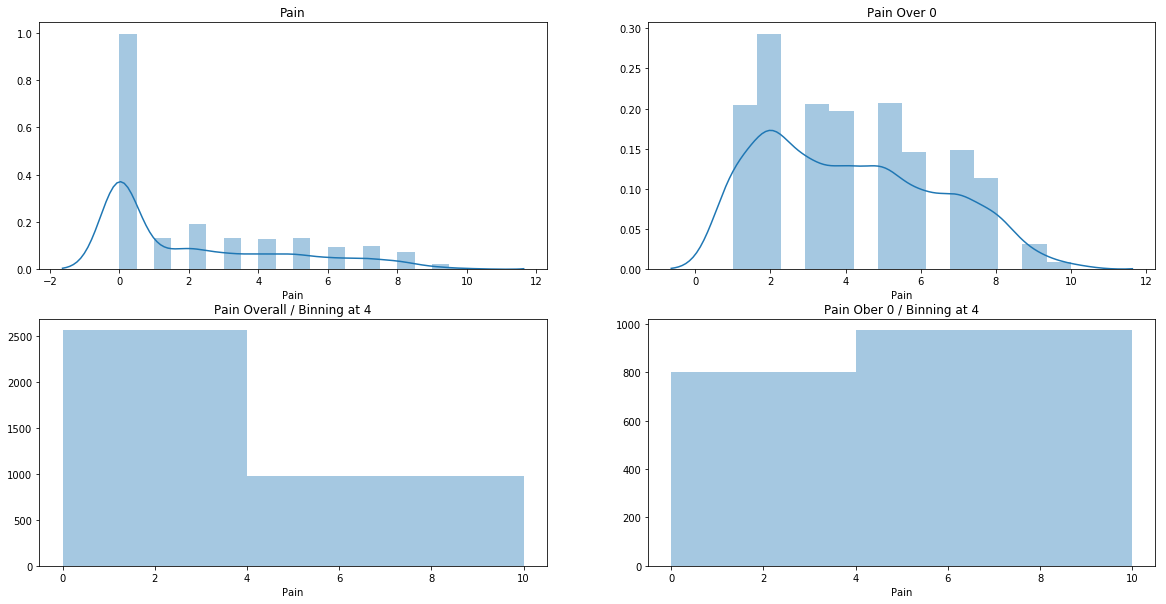

In [543]:
diary = diary.fillna(0)

fig, ax = plt.subplots(2,2,figsize=(20,10))

ax[0][0].set_title("Pain")
ax[0][1].set_title("Pain Over 0")
ax[1][0].set_title("Pain Overall / Binning at 4")
ax[1][1].set_title("Pain Ober 0 / Binning at 4")

sns.distplot(diary["Pain"],ax=ax[0][0])
sns.distplot(diary[diary["Pain"]>0]["Pain"],ax=ax[0][1])

sns.distplot(diary["Pain"], bins=[0,4,10],ax=ax[1][0], kde=False)
sns.distplot(diary[diary["Pain"]>0]["Pain"], bins = [0,4,10],ax=ax[1][1], kde=False)

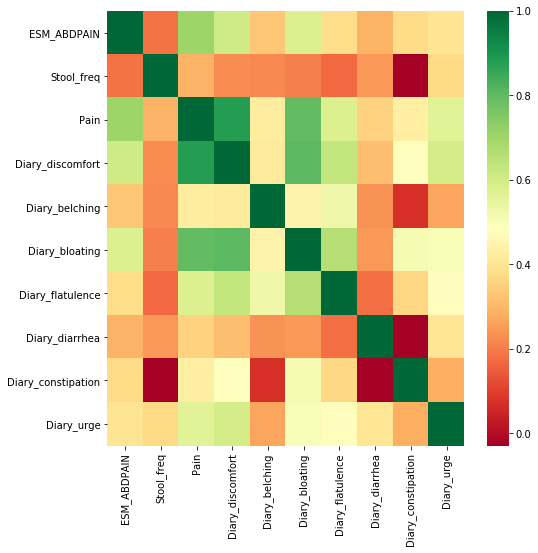

In [544]:
diary_med_drop = diary.drop(['Diary_med1_name','Diary_med1_dos','Diary_med1_numb','Diary_med2_name','Diary_med2_dos',
                              'Diary_med2_numb','Diary_med3_name','Diary_med3_dos','Diary_med3_numb','Diary_med4_name',
                              'Diary_med4_dos','Diary_med4_numb','Diary_med5_name','Diary_med5_dos','Diary_med5_numb',
                              'Diary_med6_name','Diary_med6_dos','Diary_med6_numb','Diary_med7_name','Diary_med7_dos',
                              'Diary_med7_numb','Diary_med8_name','Diary_med8_dos','Diary_med8_numb'], axis=1, inplace=True)
fig,ax = plt.subplots(1,1,figsize=(8,8))
cor = diary.corr()
sns.heatmap(cor,cmap=pl.cm.RdYlGn)

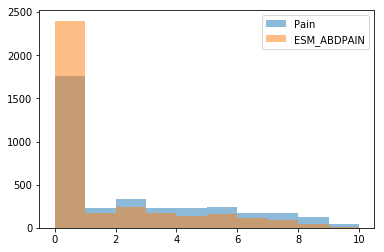

In [526]:
import numpy
from matplotlib import pyplot
pain = diary['Pain']
ESM = diary['ESM_ABDPAIN']

pyplot.hist(pain, alpha=0.5, label='Pain')
pyplot.hist(ESM, alpha=0.5, label='ESM_ABDPAIN')
pyplot.legend(loc='upper right')
pyplot.show()

